# Heterogeneity in Dahu

In [1]:
import io
import zipfile
import pandas
from plotnine import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # removing annoying Pandas warning

def read_csv(archive_name, csv_name, columns=None):
    archive = zipfile.ZipFile(archive_name)
    df= pandas.read_csv(io.BytesIO(archive.read(csv_name)))
    df.columns = df.columns.str.strip()
    return df

directory = 'heterogeneity_exp/'

/home/tom/.local/share/virtualenvs/mpi_calibration-tfxxshdH/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/tom/.local/share/virtualenvs/mpi_calibration-tfxxshdH/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
import os
import yaml

def read_file(archive_name):
    df = read_csv(archive_name, 'results.csv')
    info = yaml.load(zipfile.ZipFile(archive_name).read('info.yaml'))
    nodes = [key for key in info if key.endswith('grid5000.fr')]
    assert len(nodes) == 1
    node = nodes[0]
    node = node[:node.index('.')]
    node = int(node[node.index('-')+1:])
    df['node'] = node
    df['index'] = range(len(df))
    return df

def read_dir(directory):
    dataframes = []
    for file in os.listdir(directory):
        dataframes.append(read_file(os.path.join(directory, file)))
    return pandas.concat(dataframes)

df = read_dir(directory)

## Graphical representation

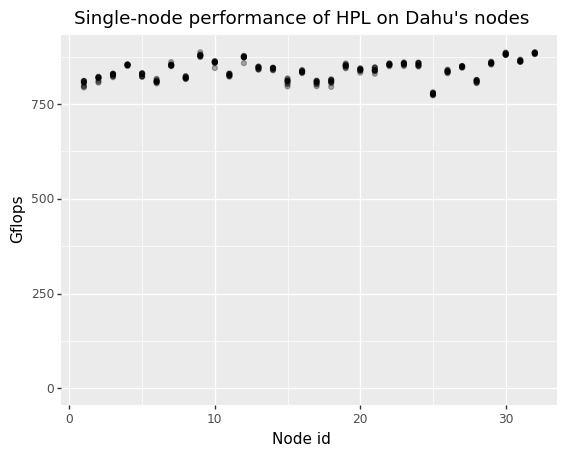

<ggplot: (8757976674347)>

In [3]:
ggplot(df, aes(x='node', y='gflops')) + geom_point(alpha=0.3) + expand_limits(y=0) + ggtitle("Single-node performance of HPL on Dahu's nodes") + ylab('Gflops') + xlab('Node id')

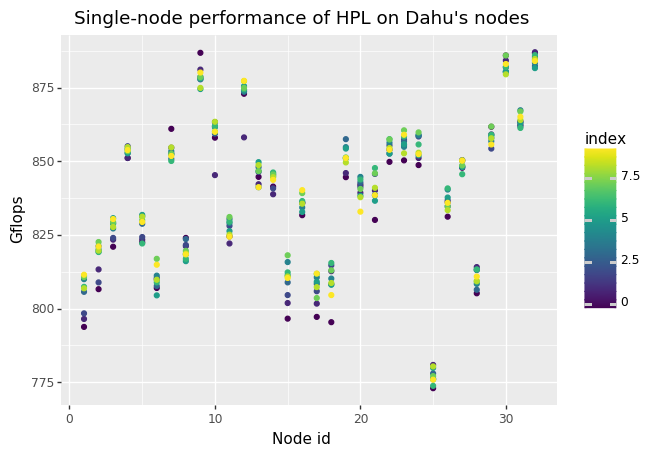

<ggplot: (-9223363278880249172)>

In [4]:
ggplot(df, aes(x='node', y='gflops', color='index')) + geom_point() + ggtitle("Single-node performance of HPL on Dahu's nodes") + ylab('Gflops') + xlab('Node id')

## Inter-node variability

In [5]:
df[['gflops', 'node', 'time']].groupby('node').mean().gflops.describe()

count     32.000000
mean     839.400000
std       25.621395
min      777.120000
25%      819.187500
50%      842.035000
75%      855.175000
max      884.550000
Name: gflops, dtype: float64

## Intra-node variability

In [6]:
df[['gflops', 'node', 'time']].groupby('node').std().gflops.describe()

count    32.000000
mean      3.540323
std       1.412516
min       1.388044
25%       2.559647
50%       3.101975
75%       4.138012
max       6.563028
Name: gflops, dtype: float64